In [68]:
# DAFT.IE WEB SCRAPING USING PYTHON

import requests
import time
import csv
from bs4 import BeautifulSoup

def scrape_and_save_to_csv(page_size=20, total_pages=5):
    base_url = 'https://www.daft.ie/property-for-sale/ireland/houses'
    data_list = []
    
    for page_num in range(total_pages):
        # Calculate the 'from' parameter for pagination
        from_param = page_num * page_size

        # Send an HTTP GET request to the URL with pagination parameters
        url = f'{base_url}?pageSize={page_size}&from={from_param}'
        html_text = requests.get(url).text
        soup = BeautifulSoup(html_text, 'lxml')

        # Find all the individual house listings
        houses = soup.find_all('li', class_='SearchPage__Result-gg133s-2 djuMQD')

        for house in houses:
            # Extract data with error handling
            address_element = house.find('h2', class_='TitleBlock__Address-sc-1avkvav-8 dzihyY')
            address = address_element.text.strip() if address_element else None

            price_element = house.find('h3', class_='TitleBlock__StyledCustomHeading-sc-1avkvav-5 blbeVq')
            price = price_element.text.strip() if price_element else None

            details = house.find_all('p', class_='TitleBlock__CardInfoItem-sc-1avkvav-9 iLMdur')
            property_type_element = house.find('p', class_='TitleBlock__CardInfoItem-sc-1avkvav-9 cKZZql')
            property_type = property_type_element.text.strip() if property_type_element else None

            # Initialize values to None
            beds, baths, floor_area = None, None, None

            # Extract beds, baths, and floor area if available
            for detail in details:
                if 'bed' in detail.text.lower():
                    beds = detail.text.strip()
                elif 'bath' in detail.text.lower():
                    baths = detail.text.strip()
                else:
                    floor_area = detail.text.strip()

            # Check if the viewing element exists before accessing its text
            viewing_element = house.find('span', class_='TitleBlock__TextWrapper-sc-1avkvav-0 hzldvs')
            viewing = viewing_element.text.strip() if viewing_element else None

            # Check if the agent name element exists before accessing its text
            agent_element = house.find('span', class_='TitleBlock__AgentNameTextWrapper-sc-1avkvav-2 izFGQg')
            agent_name = agent_element.text.strip() if agent_element else None

            # Append the extracted data to the list
            data_list.append([address, price, beds, baths, floor_area, property_type, viewing, agent_name])

        # Add some delay between page requests to avoid overloading the server
        time.sleep(1)

    csv_file = 'DaftHomesForSale.csv'
    headers = ['Address', 'Price', 'Beds', 'Baths', 'Floor Area', 'Property Type', 'Viewing', 'Agent Name']

    # Write the data to the CSV file
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(headers)  # Write the headers
        writer.writerows(data_list)  # Write the data rows

    print("Data extraction completed. The data has been saved to", csv_file)

if __name__ == '__main__':
    scrape_and_save_to_csv(page_size=20, total_pages=519)


Data extraction completed. The data has been saved to DaftHomesForSale.csv


In [111]:
import pandas as pd

df = pd.read_csv('DaftHomesForSaleORIGINAL.csv')

# Function to extract value after the last comma in address column
def extract_last_comma_value(address):
    return address.split(',')[-1].strip()

df.dropna(subset=['Address', 'Baths', 'Beds'], inplace=True)

# new column 'Location' and apply the function to extract the value
df['Location'] = df['Address'].apply(extract_last_comma_value)

df['Beds'] = df['Beds'].str.replace(' Bed', '')
df['Baths'] = df['Baths'].str.replace(' Bath', '')

# Remove euro symbol and any keywords from the 'Price' column, keeping only the numerical value
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True)

# Replace empty strings in the 'Price' column with NaN
df['Price'] = df['Price'].replace('', pd.NA)

# Drop rows with NaN values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)

df['Price'] = df['Price'].astype(float).astype(int)
df['Baths'] = df['Baths'].astype(int)
df['Beds'] = df['Beds'].astype(int)


print(df)
df.to_csv('DaftHomesForSale.csv', index=False)


                                                 Address   Price  Beds  Baths  \
0      33 Maple Avenue, Janeville, Carrigaline, Co. Cork  475000     4      4   
1      26 The Crescent, Heathfield, Ballincollig, Co....  475000     4      3   
2         43 Oakdene, Herons Wood, Carrigaline, Co. Cork  520000     4      3   
3      18 Newenham Drive, Maryborough Estate, Rochest...  520000     4      2   
4               205 Adam's Villas, Tullamore, Co. Offaly  380000     4      2   
...                                                  ...     ...   ...    ...   
10358   Gairdín na hAbhann, Castlehyde, Fermoy, Co. Cork  795000     3      2   
10359                 Magheracorran, Convoy, Co. Donegal  113500     4      1   
10360         Aughoose, Pullathomas, Belmullet, Co. Mayo  230000     3      2   
10361                14 Garrai Ard, Banagher, Co. Offaly  225000     4      2   
10362                       Newtown, Killaloe, Co. Clare  390000     5      3   

      Floor Area Property T

In [72]:
# IMPORT

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [112]:
# ACQUIRE DATA

df = pd.read_csv('DaftHomesForSale.csv')

In [113]:
# ANALYSE BY DESCRIBING DATA

print(df.columns.values)



['Address' 'Price' 'Beds' 'Baths' 'Floor Area' 'Property Type' 'Viewing'
 'Agent Name' 'Location']


In [ ]:
# PREVIEWING THE DATA

In [114]:
df.head()

,Address,Price,Beds,Baths,Floor Area,Property Type,Viewing,Agent Name,Location
0,"33 Maple Avenue, Janeville, Carrigaline, Co. Cork",475000,4,4,160 m²,Semi-D,Open Viewing,Dan Howard & Co. Ltd,Co. Cork
1,"26 The Crescent, Heathfield, Ballincollig, Co....",475000,4,3,138 m²,Semi-D,NaN,Dan Howard & Co. Ltd,Co. Cork
2,"43 Oakdene, Herons Wood, Carrigaline, Co. Cork",520000,4,3,144 m²,Detached,NaN,Dan Howard & Co. Ltd,Co. Cork
3,"18 Newenham Drive, Maryborough Estate, Rochest...",520000,4,2,NaN,Detached,NaN,Dan Howard & Co. Ltd,Co. Cork
4,"205 Adam's Villas, Tullamore, Co. Offaly",380000,4,2,89 m²,Detached,NaN,Kate O'Shea Auctioneers,Co. Offaly


In [137]:
df.tail()

,Address,Price,Beds,Baths,Floor Area,Property Type,Viewing,Agent Name,Location
9370,"Gairdín na hAbhann, Castlehyde, Fermoy, Co. Cork",795000,3,2,130 m²,Detached,NaN,NaN,Co. Cork
9371,"Magheracorran, Convoy, Co. Donegal",113500,4,1,NaN,Detached,NaN,NaN,Co. Donegal
9372,"Aughoose, Pullathomas, Belmullet, Co. Mayo",230000,3,2,NaN,Detached,NaN,NaN,Co. Mayo
9373,"14 Garrai Ard, Banagher, Co. Offaly",225000,4,2,NaN,Semi-D,NaN,NaN,Co. Offaly
9374,"Newtown, Killaloe, Co. Clare",390000,5,3,156 m²,Detached,NaN,NaN,Co. Clare


In [116]:
# FEATURES CONTAIN BLANK, NULL OR EMPTY VALUES?

df.isnull().sum()

Address             0
Price               0
Beds                0
Baths               0
Floor Area       2116
Property Type       0
Viewing          8453
Agent Name       9286
Location            0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9375 entries, 0 to 9374
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Address        9375 non-null   object
 1   Price          9375 non-null   int64 
 2   Beds           9375 non-null   int64 
 3   Baths          9375 non-null   int64 
 4   Floor Area     7259 non-null   object
 5   Property Type  9375 non-null   object
 6   Viewing        922 non-null    object
 7   Agent Name     89 non-null     object
 8   Location       9375 non-null   object
dtypes: int64(3), object(6)
memory usage: 659.3+ KB


In [119]:
#

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,9375.0,2.178335e+07,2.065589e+09,25000.0,228750.0,335000.0,495000.0,2.000002e+11
Beds,9375.0,3.628053e+00,1.399047e+00,1.0,3.0,3.0,4.0,4.000000e+01
Baths,9375.0,2.378027e+00,1.342558e+00,1.0,1.0,2.0,3.0,2.000000e+01


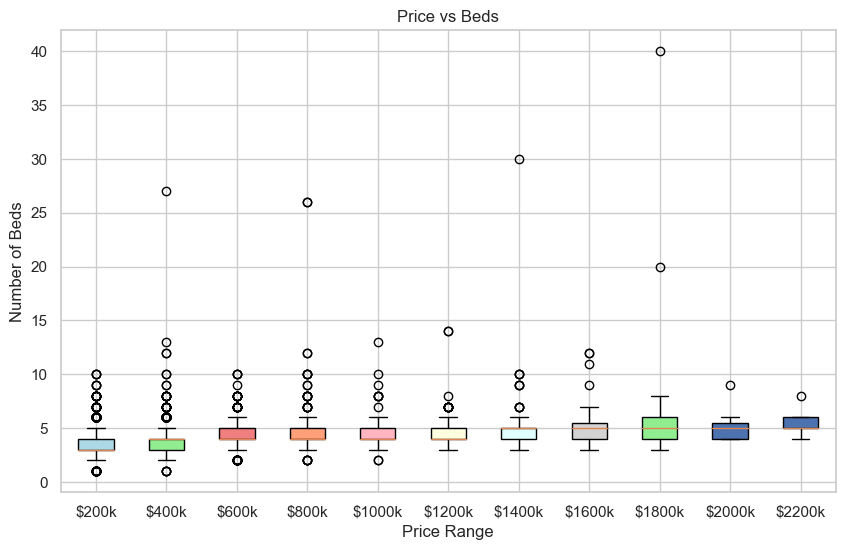

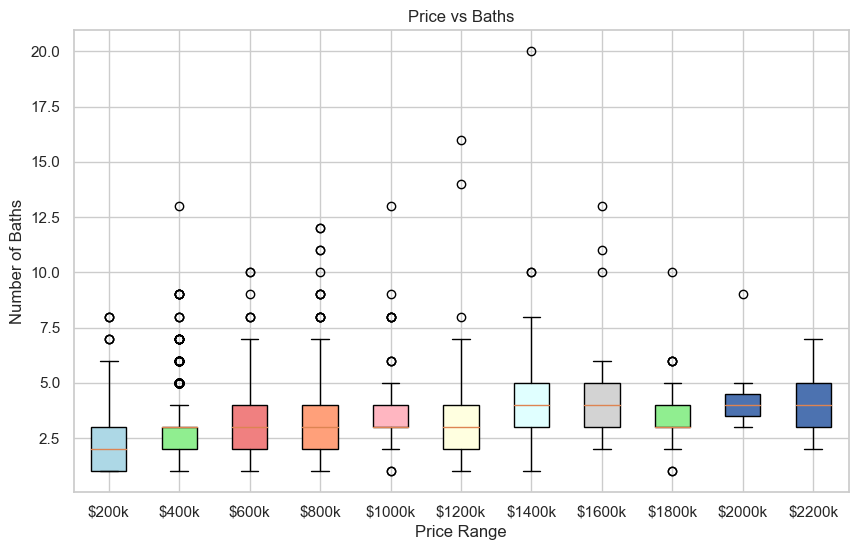

In [161]:

# Define price ranges from 200k to 2.5M with intervals of 200k
price_ranges = list(range(200000, 2500001, 200000))

# Group data based on price ranges
df['Price_Range'] = pd.cut(df['Price'], bins=price_ranges, labels=[f"${x // 1000}k" for x in price_ranges[:-1]])

# Define different colors for each box
box_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightyellow', 'lightcyan', 'lightgrey', 'lightgreen']

# Create the box plot for Beds with different colors
plt.figure(figsize=(10, 6))
bp = plt.boxplot([df[df['Price_Range'] == f"${x // 1000}k"]['Beds'] for x in price_ranges[:-1]],
                 labels=[f"${x // 1000}k" for x in price_ranges[:-1]],
                 patch_artist=True)

# Set the box colors
for box, color in zip(bp['boxes'], box_colors):
    box.set(facecolor=color)

plt.xlabel("Price Range")
plt.ylabel("Number of Beds")
plt.title("Price vs Beds")
plt.grid(True)
plt.show()

# Create the box plot for Baths with different colors
plt.figure(figsize=(10, 6))
bp = plt.boxplot([df[df['Price_Range'] == f"${x // 1000}k"]['Baths'] for x in price_ranges[:-1]],
                 labels=[f"${x // 1000}k" for x in price_ranges[:-1]],
                 patch_artist=True)

# Set the box colors
for box, color in zip(bp['boxes'], box_colors):
    box.set(facecolor=color)

plt.xlabel("Price Range")
plt.ylabel("Number of Baths")
plt.title("Price vs Baths")
plt.grid(True)
plt.show()


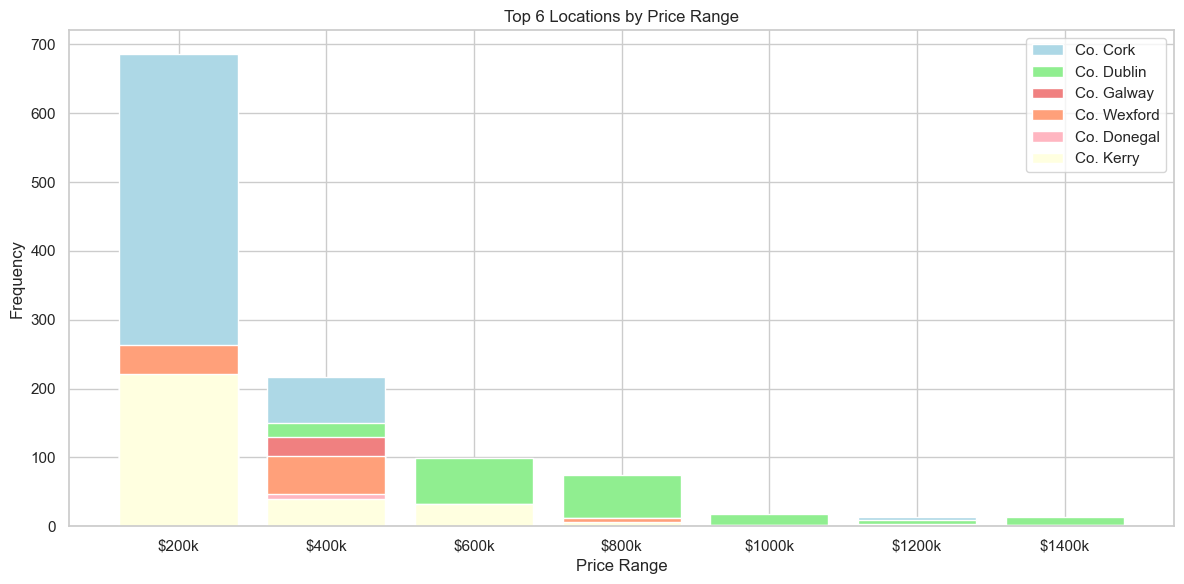

In [168]:

# Define price ranges from 200k to 1.6M with intervals of 200k
price_ranges = list(range(200000, 1600001, 200000))

# Group data based on price ranges for each location
df['Price_Range'] = pd.cut(df['Price'], bins=price_ranges, labels=[f"${x // 1000}k" for x in price_ranges[:-1]])

# Get the top 6 locations based on the number of listings
top_locations = df['Location'].value_counts().nlargest(6).index

# Filter data for the top 6 locations
top_locations_data = df[df['Location'].isin(top_locations)]

# Create the bar plot for the top 6 locations with different colors for price ranges
plt.figure(figsize=(12, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightyellow']
for i, loc in enumerate(top_locations):
    loc_data = top_locations_data[top_locations_data['Location'] == loc]
    counts_by_price_range = loc_data['Price_Range'].value_counts().sort_index()
    plt.bar(counts_by_price_range.index, counts_by_price_range.values, label=loc, color=colors[i])

plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.title("Top 6 Locations by Price Range")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [192]:
df = pd.read_csv('DaftHomesForSale.csv')
print(df.head())

                                             Address   Price  Beds  Baths  \
0  33 Maple Avenue, Janeville, Carrigaline, Co. Cork  475000     4      4   
1  26 The Crescent, Heathfield, Ballincollig, Co....  475000     4      3   
2     43 Oakdene, Herons Wood, Carrigaline, Co. Cork  520000     4      3   
3  18 Newenham Drive, Maryborough Estate, Rochest...  520000     4      2   
4           205 Adam's Villas, Tullamore, Co. Offaly  380000     4      2   

   Floor Area Property Type       Viewing               Agent Name    Location  
0       160.0        Semi-D  Open Viewing     Dan Howard & Co. Ltd    Co. Cork  
1       138.0        Semi-D           NaN     Dan Howard & Co. Ltd    Co. Cork  
2       144.0      Detached           NaN     Dan Howard & Co. Ltd    Co. Cork  
3         NaN      Detached           NaN     Dan Howard & Co. Ltd    Co. Cork  
4        89.0      Detached           NaN  Kate O'Shea Auctioneers  Co. Offaly  


In [212]:
import pandas as pd

df = pd.read_csv('DaftHomesForSale.csv')
df['Floor Area'].fillna(0, inplace=True)
df.to_csv('DaftHomesForSale.csv', index=False)


In [202]:
df = pd.read_csv('DaftHomesForSale.csv')
print(df.head())

                                             Address   Price  Beds  Baths  \
0  33 Maple Avenue, Janeville, Carrigaline, Co. Cork  475000     4      4   
1  26 The Crescent, Heathfield, Ballincollig, Co....  475000     4      3   
2     43 Oakdene, Herons Wood, Carrigaline, Co. Cork  520000     4      3   
3  18 Newenham Drive, Maryborough Estate, Rochest...  520000     4      2   
4           205 Adam's Villas, Tullamore, Co. Offaly  380000     4      2   

   Floor Area Property Type       Viewing               Agent Name    Location  
0       160.0        Semi-D  Open Viewing     Dan Howard & Co. Ltd    Co. Cork  
1       138.0        Semi-D           NaN     Dan Howard & Co. Ltd    Co. Cork  
2       144.0      Detached           NaN     Dan Howard & Co. Ltd    Co. Cork  
3         0.0      Detached           NaN     Dan Howard & Co. Ltd    Co. Cork  
4        89.0      Detached           NaN  Kate O'Shea Auctioneers  Co. Offaly  


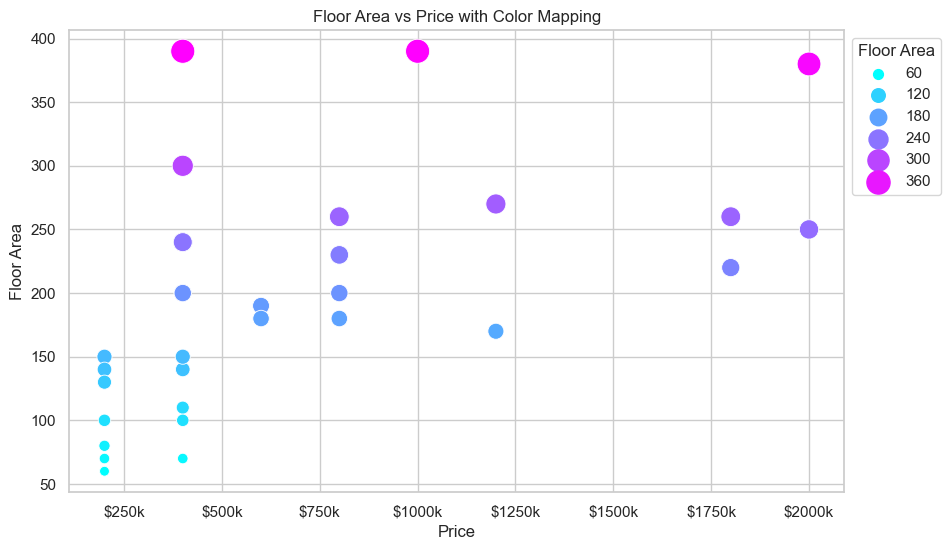

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

price_ranges = list(range(200000, 2500001, 200000))
floor_areas = list(range(50, 401, 10))

data = pd.read_csv('DaftHomesForSale.csv')

filtered_data = data[(data["Price"].isin(price_ranges)) & (data["Floor Area"].isin(floor_areas))]

# Create the scatter plot with color mapping
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x="Price", y="Floor Area", hue="Floor Area", palette="cool", size="Floor Area", sizes=(50, 300))
plt.xlabel("Price")
plt.ylabel("Floor Area")
plt.title("Floor Area vs Price with Color Mapping")

# Format the price axis
def price_formatter(x, pos):
    return f"${int(x/1000)}k"

plt.gca().xaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.grid(True)
plt.legend(title="Floor Area", bbox_to_anchor=(1, 1))
plt.show()
